# Machine Learning 


1.1) Simple Linear Regression


Objective : Determine the linear relationsip between How many Company Spends on Radio Advertising each year and its annual Sales Terms of units sold.

In [8]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Readind DataSets
df = pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Advertising.csv")

In [10]:
#Preview of data
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
#Droping First Column
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
#Checking Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
#Preparing X and y using Pandas
X =  df[['TV']]
y = df['Sales']

In [16]:
#Checking shape of feature matrix X
print(X.shape, y.shape)

(200, 1) (200,)


Splitting dataset into training and test data.

In [18]:
#Import module for splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=0)

In [20]:
#Default split is 75% for training and 25% for testing.
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(150, 1) (50, 1) (150,) (50,)


Training Model on Training Dataset

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Instantiate

In [23]:
lr = LinearRegression()
#Fit Model to training data(Learn the coefficients)
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
# THe slops and Intercept of the line fit
print("Intercept",lr.intercept_,'\n',"Coeficient",lr.coef_)

Intercept 7.248909283005854 
 Coeficient [0.04614341]


Making Predictions on the testing Set

In [31]:
# Predictions on the testing set
y_pred = lr.predict(X_test)
print(len(y_pred))

50


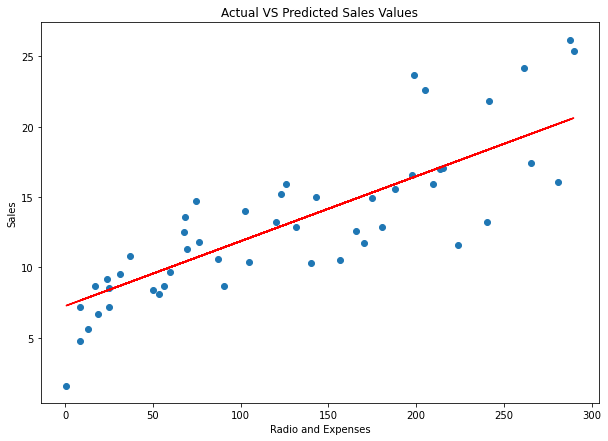

In [38]:
# Ploting Outputs

plt.figure(figsize=(10,7))
plt.title("Actual VS Predicted Sales Values")
plt.xlabel("Radio and Expenses")
plt.ylabel("Sales")

plt.scatter(x=X_test,y=y_test)
plt.plot(X_test, y_pred, color='red')

Model Evaluation

Evaluate the model on the bais of differences between the predicted values form model and actual values from test data.

In [39]:
# Mean Abolute ERROR (MAE)
print("MAE",metrics.mean_absolute_error(y_test, y_pred))
# Mean Square Error (MSE)
print("MSE",metrics.mean_squared_error(y_test,y_pred))
# Root Mean Square Error (RMSE)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 2.298513328039085
MSE 8.730248872947453
RMSE 2.954699455604149


R- Square Value


In [40]:
print("R-Square Value of Predictions", metrics.r2_score(y_test,y_pred))

R-Square Value of Predictions 0.6902574858002379


Model performance is poor because only explain/understands 15% of the variation.



Check Actual and Predicted Values

In [43]:
Check = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.ravel()})
Check

,Actual,Predicted
0,11.3,10.442033
1,8.4,9.556080
2,8.7,11.420273
3,25.4,20.616654
4,11.7,15.102517
5,8.7,9.842169
6,7.2,7.650357
7,13.2,18.327941
8,9.2,8.347122
9,16.6,16.366847


Residual Analysis

Text(10.049999999999997, 0.5, 'count')

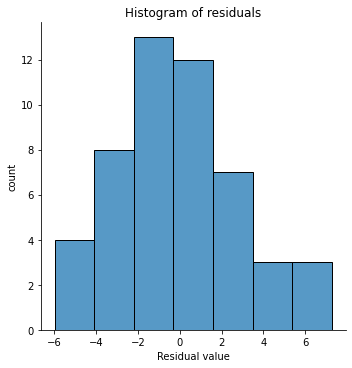

In [48]:
# Residuals is subtraction of y_test, y_pred
resids = np.subtract(y_test, y_pred)
sns.displot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')